In [6]:
from torch import nn
import torch
from torch.nn import functional as F

Test

In [2]:
linear = nn.Linear(64,30)

In [3]:
list(linear.parameters())

[Parameter containing:
 tensor([[-0.0939, -0.0826,  0.1049,  ...,  0.0021, -0.0599, -0.0877],
         [-0.0044,  0.0065, -0.0554,  ...,  0.0486,  0.1140, -0.0727],
         [ 0.0176,  0.0123,  0.1015,  ..., -0.1201, -0.0947, -0.0715],
         ...,
         [-0.0680, -0.0062, -0.0988,  ..., -0.0618, -0.0185, -0.0852],
         [ 0.0578, -0.1157,  0.0002,  ..., -0.0328, -0.0481,  0.0697],
         [ 0.0788,  0.0141,  0.0714,  ..., -0.0159,  0.0530, -0.0177]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0418, -0.0474, -0.0762, -0.1161, -0.0092, -0.0704,  0.0261, -0.1004,
         -0.0282, -0.0279,  0.1210,  0.0920, -0.0228,  0.1233, -0.0547,  0.0423,
         -0.1147, -0.0921,  0.0052,  0.0340, -0.0615, -0.0736,  0.0559,  0.1228,
         -0.0376,  0.1036, -0.0855,  0.1182, -0.0173,  0.0130],
        requires_grad=True)]

In [6]:
linear.weight, linear.weight.shape

(Parameter containing:
 tensor([[-0.0939, -0.0826,  0.1049,  ...,  0.0021, -0.0599, -0.0877],
         [-0.0044,  0.0065, -0.0554,  ...,  0.0486,  0.1140, -0.0727],
         [ 0.0176,  0.0123,  0.1015,  ..., -0.1201, -0.0947, -0.0715],
         ...,
         [-0.0680, -0.0062, -0.0988,  ..., -0.0618, -0.0185, -0.0852],
         [ 0.0578, -0.1157,  0.0002,  ..., -0.0328, -0.0481,  0.0697],
         [ 0.0788,  0.0141,  0.0714,  ..., -0.0159,  0.0530, -0.0177]],
        requires_grad=True),
 torch.Size([30, 64]))

In [7]:
linear.bias, linear.bias.shape

(Parameter containing:
 tensor([ 0.0418, -0.0474, -0.0762, -0.1161, -0.0092, -0.0704,  0.0261, -0.1004,
         -0.0282, -0.0279,  0.1210,  0.0920, -0.0228,  0.1233, -0.0547,  0.0423,
         -0.1147, -0.0921,  0.0052,  0.0340, -0.0615, -0.0736,  0.0559,  0.1228,
         -0.0376,  0.1036, -0.0855,  0.1182, -0.0173,  0.0130],
        requires_grad=True),
 torch.Size([30]))

In [10]:
x = torch.randn((5,64))
z = linear(x)
z.shape

torch.Size([5, 30])

**Build a MLP model**

3 ways to build a model: <br>
&emsp;&emsp;**1.** nn`<class>` and F.`<function>` &emsp;&emsp;--*popular way*--<br>
&emsp;&emsp;**2.** nn`<class>` only<br>
&emsp;&emsp;**3.** nn.Sequential<br>

#### **1.** nn`<class>` and F.`<function>`

In [9]:
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()
        self.l1 = nn.Linear(num_in, num_hidden)
        self.l2 = nn.Linear(num_hidden, num_out)

    def forward(self, X):
        z1 = self.l1(X)
        a1 = F.relu(z1)
        x = self.l2(a1)

        return x
        

In [ ]:
model = MLP(64, 30, 10)
X = torch.randn(5, 64)
Z = model(X)
Z.shape

#### **2.** nn`<class>`

In [8]:
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()
        self.l1 = nn.Linear(num_in, num_hidden)
        self.l2 = nn.Linear(num_hidden, num_out)
        self.relu = nn.ReLU()

    def forward(self,X):
        z1 = self.l1(X)
        a1 = self.relu(z1)
        x = self.l2(a1)

        return x

In [ ]:
model = MLP(64, 30, 10)
X = torch.randn(5, 64)
Z = model(X)
Z.shape

#### 3. nn.Sequential

In [ ]:
 model = nn.Sequential(
    nn.Linear(num_in, num_hidden),
    nn.ReLU(),
    nn.Linear(num_hidden, num_out)
)

In [ ]:
Z = model(X)
Z.shape

### Integrate nn module with learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch
from torch.nn import functional as F
from sklearn.model_selection import train_test_split

In [2]:
dataset = datasets.load_digits()
images = dataset['images']
target = dataset['target']

In [14]:
X_train, X_val, y_train,y_val = train_test_split(images, target, test_size=0.2,random_state=42)

# normalization
x_mean = X_train.mean()
x_std = X_train.std()
X_train = (X_train - x_mean)/x_std
X_val = (X_val - x_mean)/x_std

X_train = torch.tensor(X_train.reshape(-1,64), dtype=torch.float32)
X_val = torch.tensor(X_val.reshape(-1,64), dtype=torch.float32)
y_train = torch.tensor(y_train)
y_val = torch.tensor(y_val)

In [15]:
class MLP(nn.Module):
    def __init__(self, num_in, num_hidden, num_out):
        super().__init__()
        self.l1 = nn.Linear(num_in, num_hidden)
        self.l2 = nn.Linear(num_hidden, num_out)

    def forward(self, X):
        z1 = self.l1(X)
        a1 = F.relu(z1)
        x = self.l2(a1)

        return x
        

In [20]:
epochs = 30
num_feature = 64
num_hidden = 30
num_class = 10

learning_rate = 0.03

batch_size = 30
num_batches = np.ceil(len(y_train)/batch_size).astype(int)
model = MLP(num_feature, num_hidden, num_class)

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    
    shuffled_indices = np.random.permutation(len(y_train))
    running_loss = 0
    
    for i in range(num_batches):
        
        start = i * batch_size
        end = start + batch_size
        batch_indices = shuffled_indices[start:end]

        # place break point
        # import pdb; pdb.set_trace()
        
        y = y_train[batch_indices] 
        X = X_train[batch_indices] 

        preds = model(X)
        loss = F.cross_entropy(preds, y)
        loss.backward()
        running_loss += loss.item()

        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate *param.grad

        model.zero_grad()


    # validation
    with torch.no_grad():
        preds_val = model(X_val)
        val_loss = F.cross_entropy(preds_val, y_val)
        val_accuracy = torch.sum(torch.argmax(preds_val, dim=1)==y_val) / y_val.shape[0]


    train_losses.append(running_loss/num_batches)
    val_losses.append(val_loss.item())
    val_accuracies.append(val_accuracies)

    print(f'epoch: {epoch}: train error: {running_loss/num_batches}, validation error: {val_loss.item()}, validation accuracy: {val_accuracy}')



epoch: 0: train error: 2.141655445098877, validation error: 1.9297327995300293, validation accuracy: 0.6166666746139526
epoch: 1: train error: 1.6647042284409206, validation error: 1.3725687265396118, validation accuracy: 0.8305555582046509
epoch: 2: train error: 1.1341558508574963, validation error: 0.898957371711731, validation accuracy: 0.8861111402511597
epoch: 3: train error: 0.7665294632315636, validation error: 0.6280798316001892, validation accuracy: 0.9083333611488342
epoch: 4: train error: 0.5562433252731959, validation error: 0.4624709188938141, validation accuracy: 0.9111111164093018
epoch: 5: train error: 0.4299967500070731, validation error: 0.3751234710216522, validation accuracy: 0.9333333373069763
epoch: 6: train error: 0.353289513848722, validation error: 0.3138071298599243, validation accuracy: 0.9277777671813965
epoch: 7: train error: 0.3005487673605482, validation error: 0.28097888827323914, validation accuracy: 0.9333333373069763
epoch: 8: train error: 0.263719524

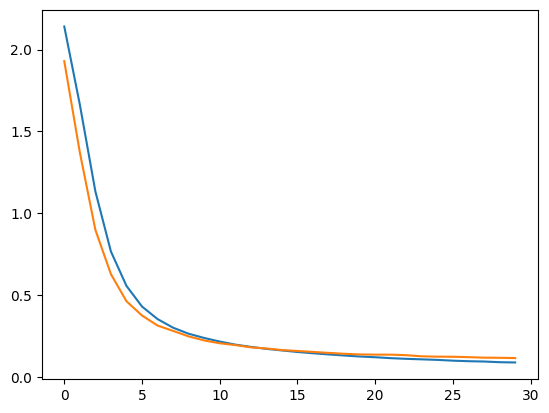

In [21]:
plt.plot(train_losses)
plt.plot(val_losses)